## 04 :: UMAP Structure

In [32]:
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Commonly used constants.

slides = [
    'B02_D1', 'B02_E1', 'B03_C2', 'B03_D2', 'B04_D1',
    'B04_E1', 'B05_D2', 'B05_E2', 'B06_E1', 'B07_C2',
    'N02_C1', 'N02_D1', 'N03_C2', 'N03_D2', 'N04_D1',
    'N04_E1', 'N05_C2', 'N05_D2', 'N06_D2', 'N07_C1']

In [33]:
lcpm_parquet   = '/media/tmo/data/work/datasets/02_ST/lcpm/lcpm.parquet'
meta_parquet   = '/media/tmo/data/work/datasets/02_ST/meta/meta.parquet'

In [34]:
%%time
lcpm_df = pd.read_parquet(lcpm_parquet)

CPU times: user 9.56 s, sys: 18.7 s, total: 28.3 s
Wall time: 12.3 s


In [91]:
meta_df = pd.read_parquet(meta_parquet)

In [93]:
st_df = lcpm_df.merge(meta_df, how='inner', on=['spot_UID', 'slide_ID'])

In [36]:
gene_columns = lcpm_df.columns[1:-1]

In [37]:
ex_matrix = lcpm_df[gene_columns].as_matrix()

In [38]:
ex_matrix.shape

(10327, 46454)

---

In [39]:
from umap import UMAP

In [40]:
def umap_minkowski(ex_matrix):
    return UMAP(n_neighbors=5,
                min_dist=0.3, 
                spread=1,
                random_state=666,
                metric='minkowski',
                metric_kwds={'p': 0.5}).fit_transform(ex_matrix)

In [41]:
def umap_euclidean(ex_matrix):
    return UMAP(n_neighbors=5,
                min_dist=0.3, 
                spread=1,
                random_state=666,
                metric='euclidean').fit_transform(ex_matrix)

In [104]:
def plot_embedding(umap_embedding, st_df=st_df):
    embedding_df = pd.DataFrame(umap_embedding, columns=['x', 'y'])
    
    fig, axes = plt.subplots(1, 5, figsize=(48, 8))
    
    marker_size=2
    
    g1 = embedding_df.plot.scatter(ax=axes[0], x='x', y='y', s=marker_size, alpha=1, c=st_df['GT'].cat.codes, cmap=plt.cm.get_cmap('tab20', 2))
    g2 = embedding_df.plot.scatter(ax=axes[1], x='x', y='y', s=marker_size, alpha=1, c=st_df['age'].cat.codes, cmap=plt.cm.get_cmap('Set1', 2))
    g3 = embedding_df.plot.scatter(ax=axes[2], x='x', y='y', s=marker_size, alpha=1, c=st_df['age_GT'].cat.codes, cmap=plt.cm.get_cmap('tab20', 4))
    g4 = embedding_df.plot.scatter(ax=axes[3], x='x', y='y', s=marker_size, alpha=1, c=st_df['slide_ID'].cat.codes, cmap=plt.cm.get_cmap('tab20'))
    g5 = embedding_df.plot.scatter(ax=axes[4], x='x', y='y', s=marker_size, alpha=1, c=st_df['AB1_StdDev_Yen'], cmap=plt.cm.get_cmap('magma_r'))
    
    for g in [g1, g2, g3, g4, g5]:
        g.grid(False)
        g.set_axis_off()
        g.set_frame_on(False)
    
    plt.show()

In [105]:
def make_categorical(df):
    cols = ['slide_ID', 'GT', 'age', 'age_GT']
    
    for col in cols:
        df[col] = df[col].astype('category')

In [106]:
make_categorical(st_df)

In [ ]:
umap_all_minkowski = umap_minkowski(st_df[gene_columns].as_matrix())

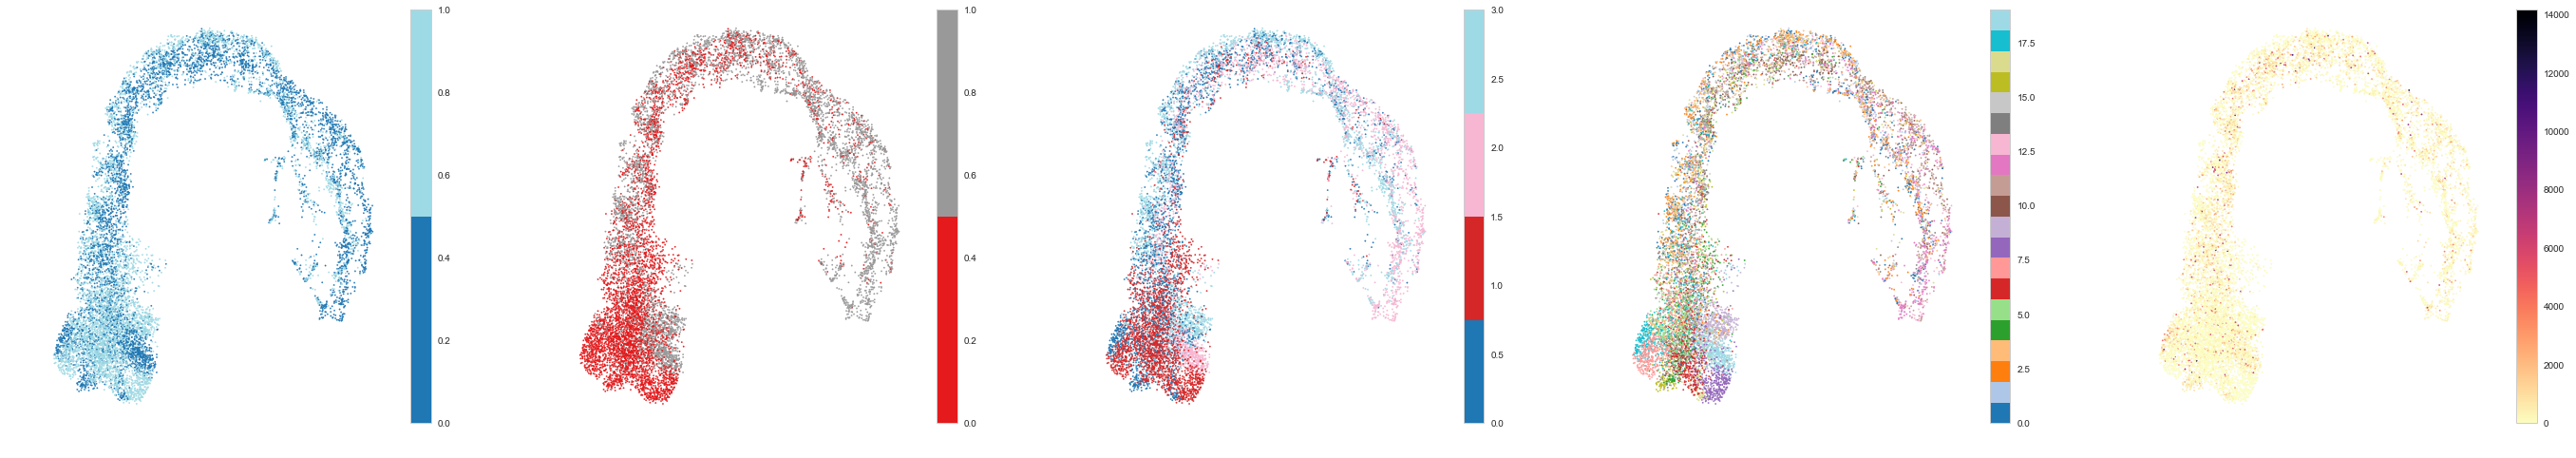

In [124]:
plot_embedding(umap_all_minkowski)

In [55]:
def random_genes(n=50):
    return list(gene_lev_df.sample(n).gene.values)

In [56]:
random_50 = random_genes(50)

In [109]:
umap_random_50 = umap_minkowski(st_df[random_50].as_matrix())

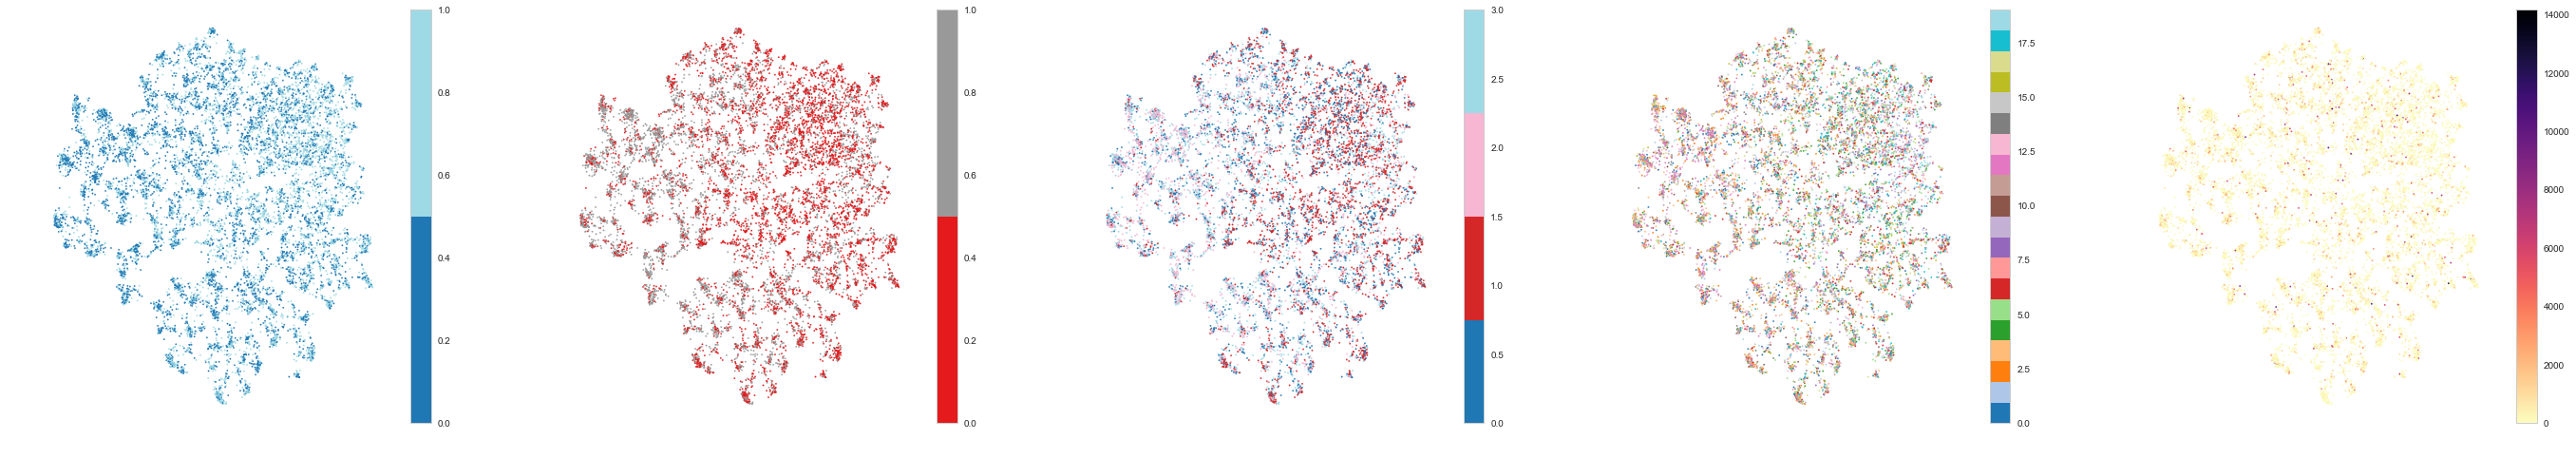

In [110]:
plot_embedding(umap_random_50)

In [117]:
random_50_b = random_genes(50)

In [118]:
umap_random_50_b = umap_minkowski(st_df[random_50_b].as_matrix())

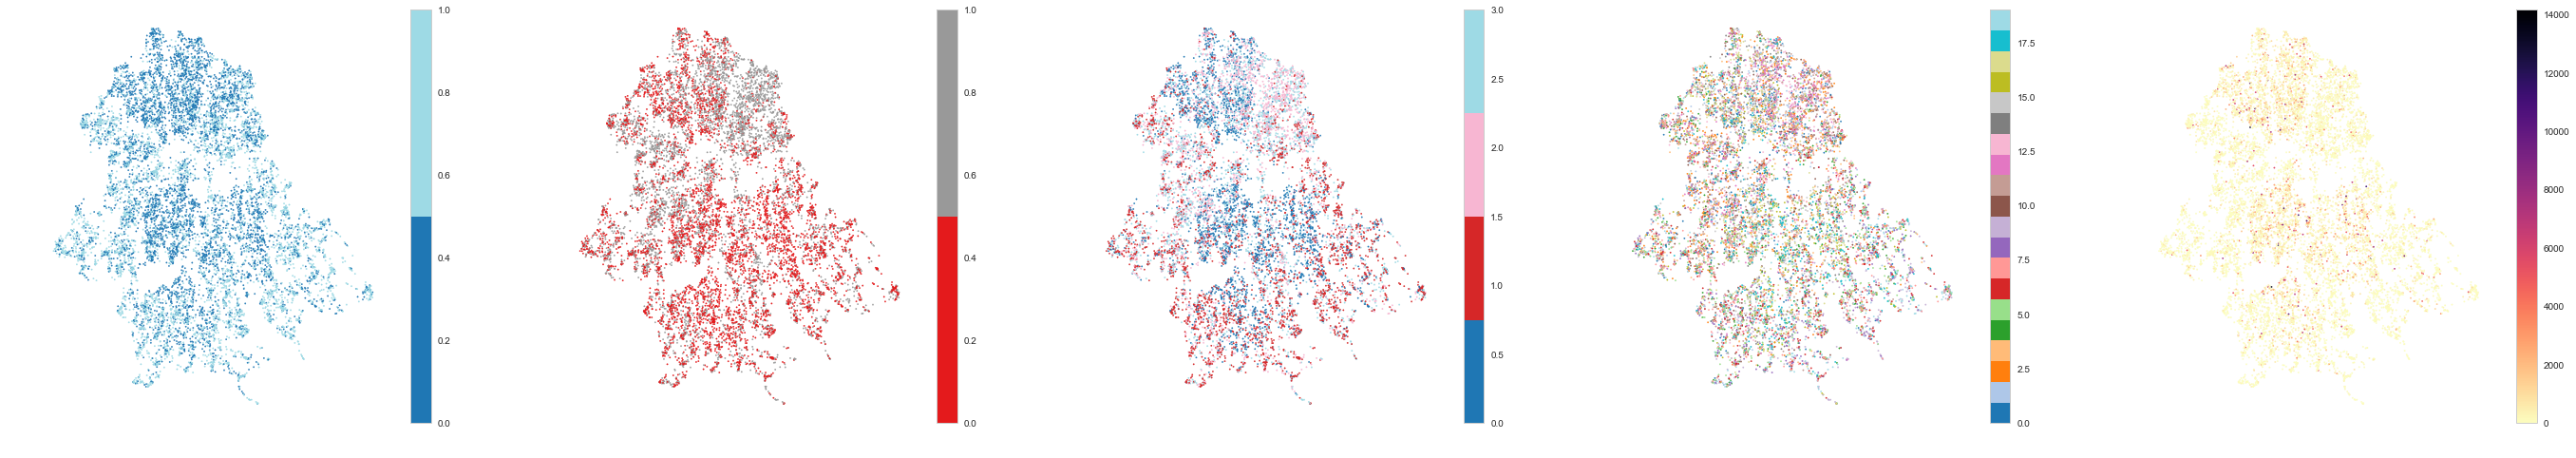

In [119]:
plot_embedding(umap_random_50_b)

In [113]:
top_lev_50 = gene_lev_df[:50].gene.values

In [114]:
top_lev_50

array(['Hba-a1', 'Pmch', 'Slc46a3', 'Hbb-bt', 'Fzd5', 'mt-Atp8',
       '2810433D01Rik', 'Hba-a2', 'Kif15', 'Tbx1', 'Gm45212', 'Gm14915',
       'Gm15728', 'Akr7a5', 'Gm16409', 'Rn7s1', 'Gm26461', 'Atp5l-ps1',
       'Tenm1', 'Olfr912.1', 'Penk', 'Gm8925', 'Hbb-bs', '1500015O10Rik',
       'Gm24601', 'Lrrc17', 'Gm4853', 'Gm14138', 'Timm22', 'Gm21685',
       'Rimbp3', 'C4b', 'Gm15536', 'Cst7', 'Tyrobp', 'RP24-243A15.3',
       'Gcn1l1', 'Entpd4', 'Gm44609', 'Gm5426', 'Rpl30-ps11', 'Pip5k1a',
       'Gm5435', 'Rpl36-ps10', 'Rps11-ps4', 'Tac1', 'Gpr88', 'Prkcd',
       'Mir6240', 'Gm9703'], dtype=object)

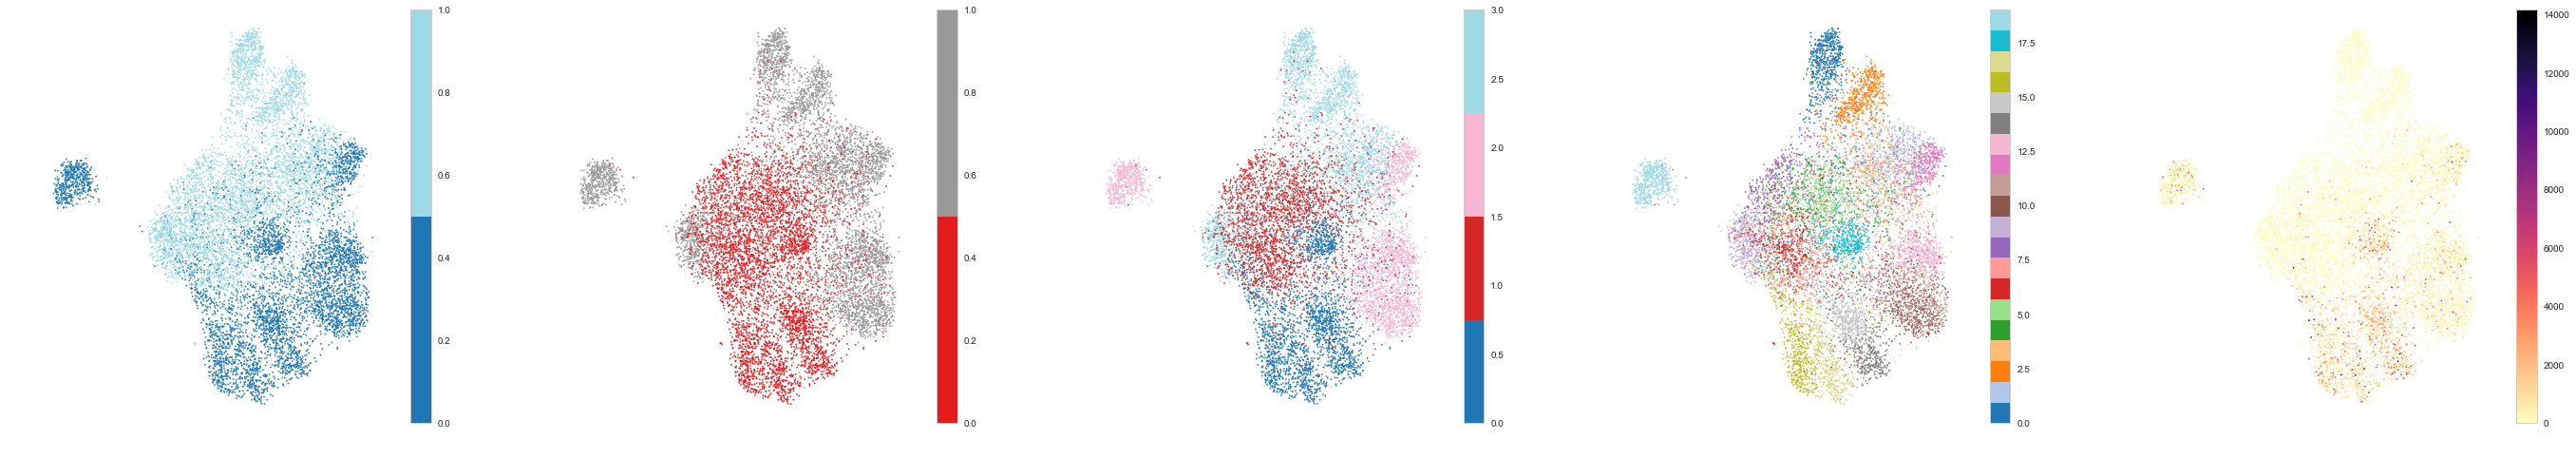

In [116]:
plot_embedding(umap_minkowski(st_df[top_lev_50].as_matrix()))

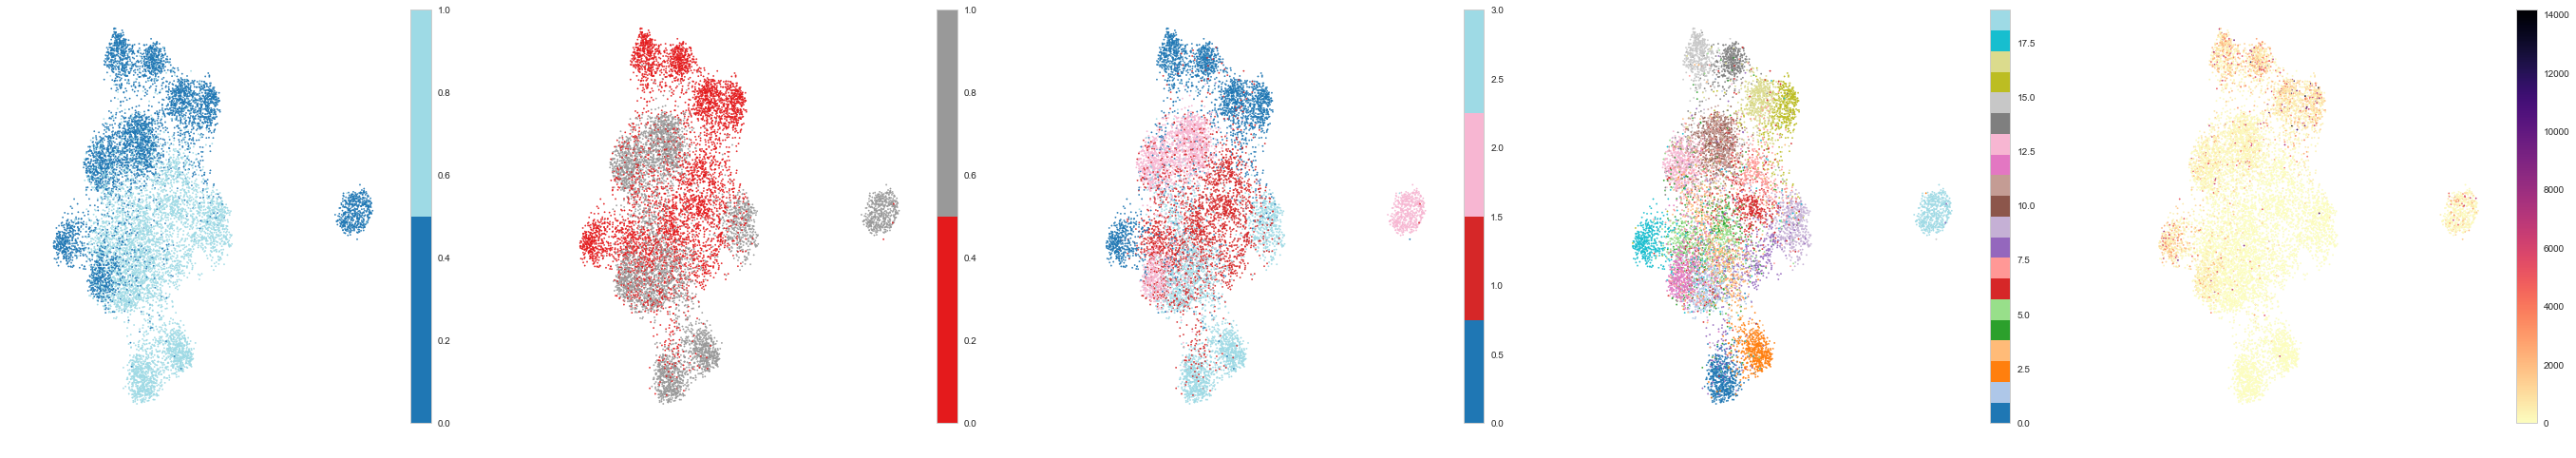

In [120]:
plot_embedding(umap_euclidean(st_df[top_lev_50].as_matrix()))

### Some ISOMAP doodles

In [125]:
from sklearn.manifold import Isomap

In [129]:
iso_embedding = Isomap(n_jobs=-1).fit_transform(st_df[top_lev_50].as_matrix())

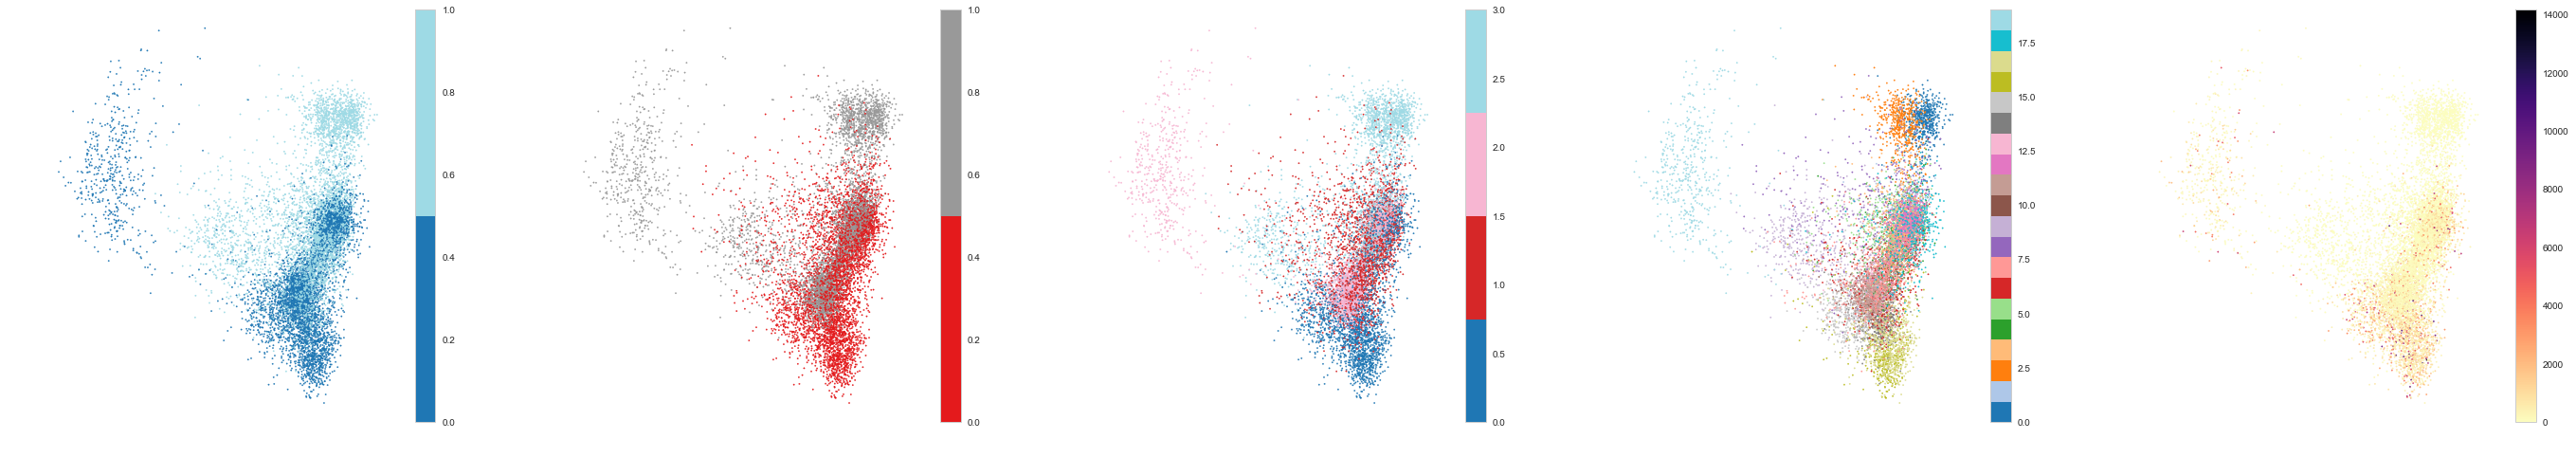

In [130]:
plot_embedding(iso_embedding)

In [131]:
iso_embedding = Isomap(n_jobs=-1).fit_transform(st_df[random_50].as_matrix())

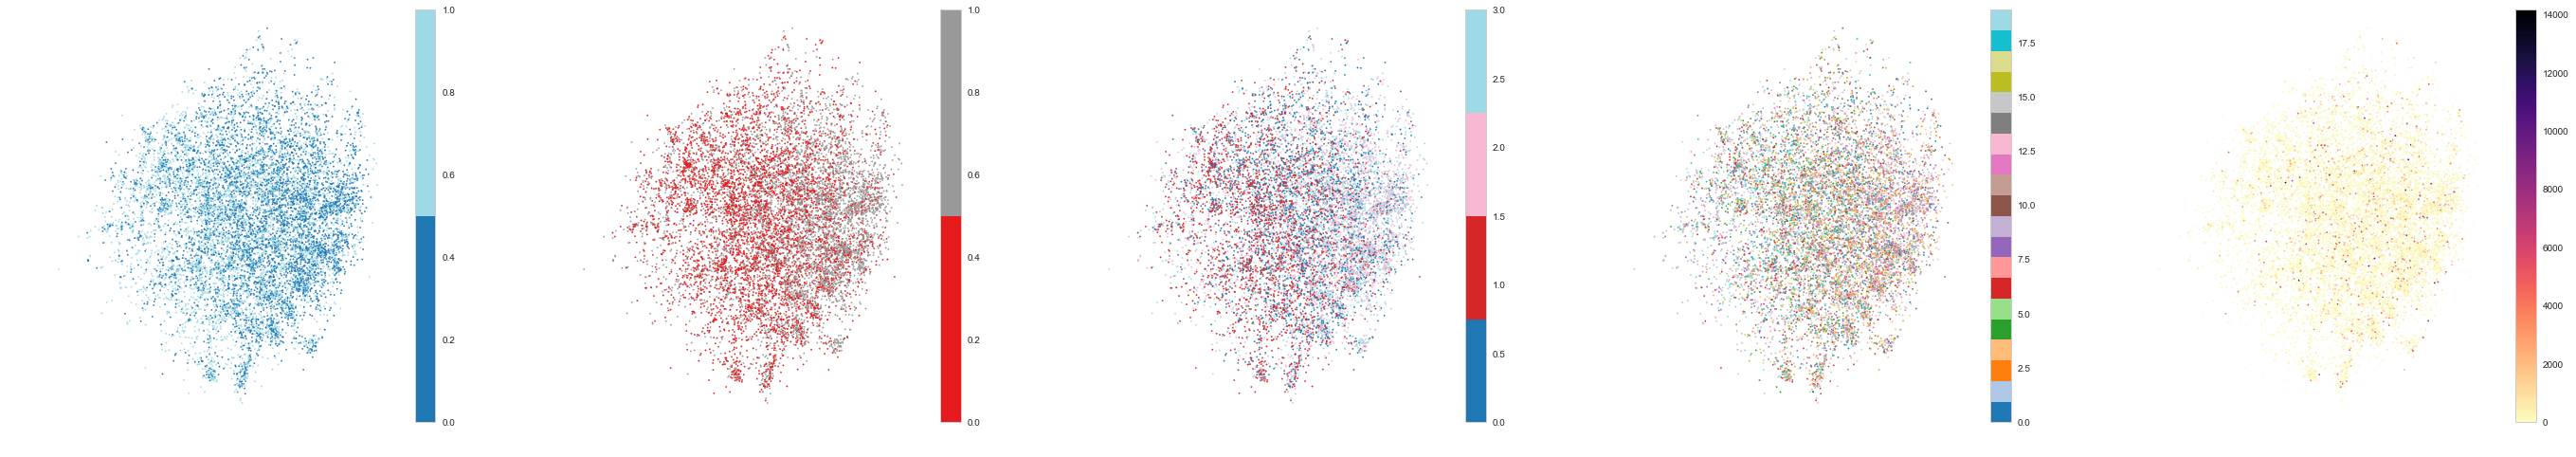

In [132]:
plot_embedding(iso_embedding)

In [144]:
st_df[st_df['GT'] == 'KI'][['AB1_StdDev_Yen']].describe()

AB1_StdDev_Yen
count     5009.000000
mean       881.651610
std       1444.236775
min          3.499769
25%        154.308193
50%        329.837907
75%        903.144838
max      14161.168653

In [154]:
st_df['AB1_StdDev_Yen'].

0.0